test pour faire le chart bar voulu

In [1]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import seaborn as sns # https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
import matplotlib.pyplot as plt



In [20]:
name_csv_logs = '../_final/cnn1/cnn_results.csv' 
cutoff = 0.9 # if score > cutoff, the machine predicted as "normal" otherwise as "anomaly"
df_logs = pd.read_csv(name_csv_logs)
df_filtre = df_logs[df_logs['machine'] == 'slider']
df_filtre = df_filtre.sort_values(by = ['score'], ascending = False)
# df_filtre['pred_n'] = df_filtre['score'].apply(lambda sc: sc > cutoff ) 
df_filtre['pred_n'] =  df_filtre['correctPrediction'].apply(lambda pred: 1 if pred == 'OK' else 0.95 ) 
df_filtre['pred_f'] =  df_filtre['file'].apply(lambda x: x.split('_')[0]) 
df_filtre['pred_r'] =  np.random.rand(df_filtre.shape[0])
df_filtre['pred_1'] =  1

In [21]:
df_filtre.head()

# df_filtre.info()

,machine,file,correctPrediction,score,pred_n,pred_f,pred_r,pred_1
0,slider,normal_id_04_00000013_.png,OK,0.999998,1.0,normal,0.612432,1
1,slider,normal_id_06_00000009_.png,OK,0.999997,1.0,normal,0.936521,1
2,slider,normal_id_04_00000065_.png,OK,0.999995,1.0,normal,0.010755,1
3,slider,normal_id_04_00000019_.png,OK,0.999991,1.0,normal,0.465660,1
4,slider,normal_id_06_00000035_.png,OK,0.999988,1.0,normal,0.676164,1


<AxesSubplot:xlabel='score', ylabel='Count'>

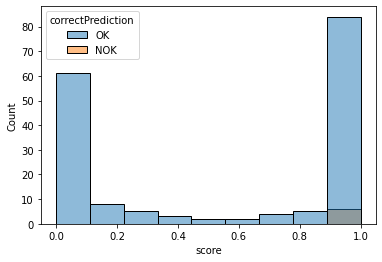

In [58]:
# g = sns.relplot(data=df_filtre, 
#                 x="score", y="pred_n", hue="correctPrediction", 
#                 height=6, aspect=2, s=90)

# plt.setp(g._legend.get_title(), fontsize=20)
# g._legend.set_bbox_to_anchor((.5, .9))
# g.set(ylim=(0.9, 1.05))

g = sns.histplot(df_filtre, x="score", hue='correctPrediction')
g.set(xlim=(-0.05,1.05), 
    #   ylim=(0,1.05),
      xticks=np.arange(0, 1.1, 0.1), 
    #   yticks=np.arange(0, 1.1, 0.1)
      )

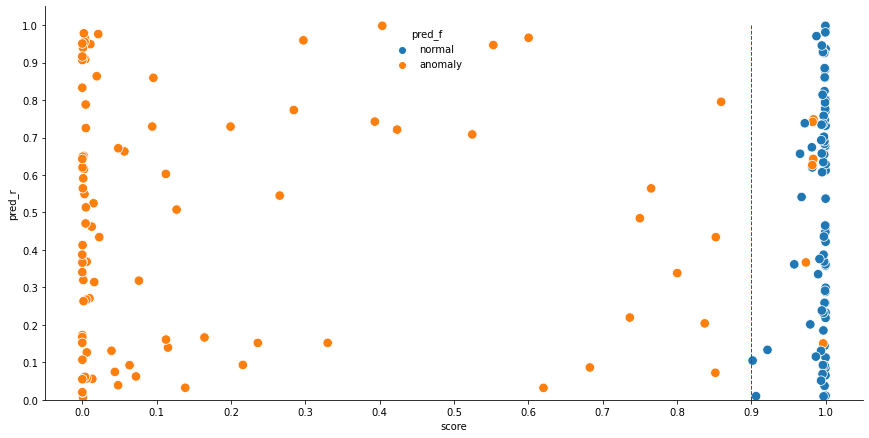

In [56]:
g = sns.relplot(data=df_filtre, 
                x="score", y="pred_r", hue="pred_f", 
                height=6, aspect=2, s=90)
g._legend.set_bbox_to_anchor((.5, .9))
g.set(xlim=(-0.05,1.05), 
      ylim=(0,1.05),
      xticks=np.arange(0, 1.1, 0.1), 
      yticks=np.arange(0, 1.1, 0.1))
plt.plot([0.9, 0.9], [1, 0], 'r--', linewidth=1)

In [17]:
df = pd.read_csv("https://jbencook.s3.amazonaws.com/data/dummy-sales-large.csv")
df.head(10)


,date,region,revenue
0,1999-01-01,AMER,650.098835
1,1999-01-01,AMER,519.729759
2,1999-01-01,AMER,920.096388
3,1999-01-01,AMER,550.643257
4,1999-01-01,EMEA,56.305622
5,1999-01-01,EMEA,107.520797
6,1999-01-02,AMER,759.057883
7,1999-01-02,AMER,1002.693327
8,1999-01-03,AMER,673.055821
9,1999-01-03,AMER,797.473896


<AxesSubplot:xlabel='revenue', ylabel='Count'>

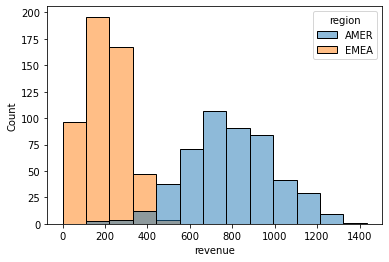

In [19]:
# Plot the histogram
sns.histplot(df, x="revenue", hue='region')